In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.size'] = 9 # This should set the size to 9pt

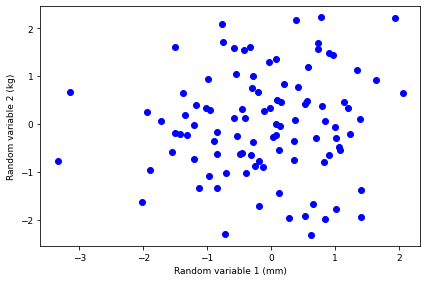

In [2]:
# If you make the plot wider than 6in, it will have to be shrunk to fit in the document, and the font size will become too small
plt.figure(figsize=(6,4))
plt.plot(np.random.normal(0, 1, 100), np.random.normal(0, 1, 100), 'bo')
plt.xlabel('Random variable 1 (mm)')
plt.ylabel('Random variable 2 (kg)')
plt.tight_layout() # Can help to fit in space for smaller plots
plt.savefig('example1.pdf') # Save the figure as a PDF

# Web Scraping

https://www.walkhighlands.co.uk/munros/most-climbed
https://www.smc.org.uk/hills/

Extracting data from these web pages

In [3]:
import re
import pandas as pd
import requests

url = 'https://www.walkhighlands.co.uk/robots.txt'
headers = {'user-agent': 'Foundations of Data Science Project'}
r = requests.get(url, headers=headers)

from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

url="https://www.walkhighlands.co.uk/munros/most-climbed"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")

gdp = soup.find_all("table", attrs={"class": "table1"})
print("Number of tables on site: ",len(gdp))

table1 = gdp[0]
body = table1.find_all("tr")
head = body[0] 
body_rows = body[1:] 

# code from https://towardsdatascience.com/web-scraping-scraping-table-data-1665b6b2271c
# Lets now iterate through the head HTML code and make list of clean headings

# Declare empty list to keep Columns names
headings = []
for item in head.find_all("th"): # loop through all th elements
    # convert the th elements to text and strip "\n"
    item = (item.text).rstrip("\n")
    # append the clean column name to headings
    headings.append(item)
print(headings)

# Next is now to loop though the rest of the rows

#print(body_rows[0])
all_rows = [] # will be a list for list for all rows
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        row.append(aa)
    # append one row to all_rows
    all_rows.append(row)
    

# We can now use the data on all_rowsa and headings to make a table
# all_rows becomes our data and headings the column names
df1 = pd.DataFrame(data=all_rows,columns=headings)

Number of tables on site:  2
['No.', 'Mountain', 'Ascents']


In [4]:
# Lets go ahead and scrape first table with HTML code gdp[0]
table2 = gdp[1]
# the head will form our column names
body = table2.find_all("tr")
# Head values (Column names) are the first items of the body list
head = body[0] # 0th item is the header row
body_rows = body[1:] # All other items becomes the rest of the rows

# Lets now iterate through the head HTML code and make list of clean headings

# Declare empty list to keep Columns names
headings = []
for item in head.find_all("th"): # loop through all th elements
    # convert the th elements to text and strip "\n"
    item = (item.text).rstrip("\n")
    # append the clean column name to headings
    headings.append(item)
print(headings)

# Next is now to loop though the rest of the rows

#print(body_rows[0])
all_rows1 = [] # will be a list for list for all rows
for row_num in range(len(body_rows)): # A row at a time
    row = [] # this will old entries for one row
    for row_item in body_rows[row_num].find_all("td"): #loop through all row entries
        # row_item.text removes the tags from the entries
        # the following regex is to remove \xa0 and \n and comma from row_item.text
        # xa0 encodes the flag, \n is the newline and comma separates thousands in numbers
        aa = re.sub("(\xa0)|(\n)|,","",row_item.text)
        #append aa to row - note one row entry is being appended
        row.append(aa)
    # append one row to all_rows
    all_rows1.append(row)
    

# We can now use the data on all_rowsa and headings to make a table
# all_rows becomes our data and headings the column names
df2 = pd.DataFrame(data=all_rows1,columns=headings)

ascentsdata = pd.concat([df1, df2], ignore_index=True)
del ascentsdata['No.']
display(ascentsdata)

['No.', 'Mountain', 'Ascents']


,Mountain,Ascents
0,Ben Lomond,20686
1,Ben Nevis,18001
2,Ben Lawers,16186
3,Schiehallion,16053
4,Beinn Ghlas,15771
...,...,...
277,Mullach na Dheiragain,1833
278,Maoile Lunndaidh,1712
279,Sgùrr Mòr (Loch Quoich),1698
280,Bidein a' Choire Sheasgaich,1680


In [5]:
heightsdata = pd.read_csv('heightsdata.csv')
display(heightsdata)

,Mountain,Height (m)
0,A' Bhuidheanach Bheag,936
1,A' Chailleach (Monadhliath),930
2,A' Chailleach,997
3,A' Chralaig,1120
4,A' Ghlas-bheinn,918
...,...,...
277,Toll Creagach,1054
278,Tolmount,958
279,Tom a' Chòinich,1112
280,Tom Buidhe,957


,Mountain,Ascents,Height (m),zscore,is_outlier
278,Lurg Mhòr,1665,986,-1.177362,False
277,Bidein a' Choire Sheasgaich,1680,945,-1.172443,False
276,Sgùrr Mòr (Loch Quoich),1698,1003,-1.166540,False
275,Maoile Lunndaidh,1712,1005,-1.161949,False
274,Mullach na Dheiragain,1833,982,-1.122266,False
...,...,...,...,...,...
19,Ben Macdui,10496,1309,1.718783,False
18,Ben Vane,10537,916,1.732229,False
17,Ben Vorlich (Loch Lomond),10777,943,1.810938,False
16,Stùc a' Chròin,10930,975,1.861114,False


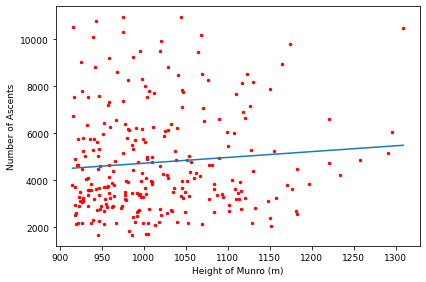

In [6]:
for df in (ascentsdata, heightsdata):
    # Strip the column(s) you're planning to join with
    df['Mountain'] = df['Mountain'].str.strip()
heightsandascents = pd.merge(ascentsdata, heightsdata, on="Mountain")

heightsandascents['Ascents'] = heightsandascents['Ascents'].replace(',', '', regex=True).astype(int)
heightsandascents.sort_values(by=['Ascents'], ascending=True, inplace=True)

from scipy.stats import zscore
heightsandascents["zscore"] = zscore(heightsandascents["Ascents"]) 
# creates `is_outlier` column with either True or False values, 
# so that you could filter your dataframe accordingly
heightsandascents["is_outlier"] = heightsandascents["zscore"].apply(lambda x: x <= -1.96 or x >=1.96)
heightsandascents1 = heightsandascents[heightsandascents.is_outlier != True]
display(heightsandascents1)
 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

x1 = heightsandascents1['Height (m)']
y1= heightsandascents1['Ascents']

plt.figure(figsize=(6,4))
plt.scatter(x1,y1,s=6,c='red')
plt.xlabel('Height of Munro (m)')
plt.ylabel('Number of Ascents')
plt.tight_layout() # Can help to fit in space for smaller plots
plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, y1, 1))(np.unique(x1)))
plt.savefig('fig2.pdf') # Save the figure as a PDF
plt.show()



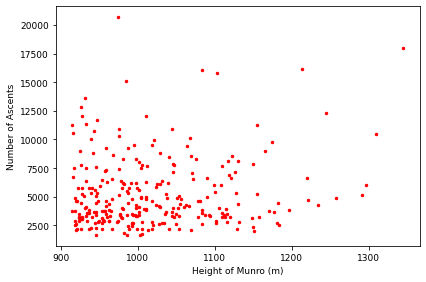

In [7]:
x = heightsandascents['Height (m)']
y= heightsandascents['Ascents']

plt.figure(figsize=(6,4))
plt.scatter(x,y,s=6,c='red')
plt.xlabel('Height of Munro (m)')
plt.ylabel('Number of Ascents')
plt.tight_layout() # Can help to fit in space for smaller plots
plt.savefig('fig1.pdf') # Save the figure as a PDF

plt.show()


In [11]:
r = np.corrcoef(x1, y1)
r

from scipy.stats import linregress
linregress(x1, y1)

LinregressResult(slope=2.476097639839843, intercept=2240.1232383772112, rvalue=0.09044315939476623, pvalue=0.14276836096456047, stderr=1.6844488746946336)